In [2]:
import sys
sys.path.append('..')

import warnings
import numpy as np
import pandas as pd 

import duckdb
from QHData.query import Query
from QHMlflow.secuntial import Sequential
from QHData.data_load import DataLoader,CodesLoader
from QHData.commodity_analyzer import CommodityAnalyzer

warnings.filterwarnings('ignore')

No module named 'wtpy'
Error importing QUANTAXIS module: No module named 'QUANTAXIS'


In [15]:
# 获取全市场主力连续合约
q = Query()
futures_list = q.fetch_future_list() 
# code_list = futures_list.code.to_list()
code_list = q.fetch_future_codes(start_date='2024-02-28',end_date='2025-02-28',n=30) # 

#  获取分钟数据
future_data = q.fetch_future_data(codes=code_list,start_date='2024-02-28',end_date='2025-02-28',frequency='60min')
# future_days = q.fetch_fut_day(codes=code_list,start_date='2024-01-01',end_date='2024-12-31')

future_data = future_data.to_pandas().set_index(['datetime','code']).sort_index()

In [13]:
future_data

open      high       low     close  volume
datetime            code                                               
2024-02-27 21:15:00 AGL8   5888.0   5892.00   5881.00   5884.00   23161
                    AOL8   3267.0   3294.00   3267.00   3283.00    5651
                    AUL8    482.1    482.22    481.84    481.92   28469
                    BUL8   3682.0   3690.00   3681.00   3686.00   12010
                    CFL8  16365.0  16380.00  16325.00  16335.00   56091
...                           ...       ...       ...       ...     ...
2025-02-28 15:00:00 URL8   1800.0   1808.00   1799.00   1805.00   12382
                    VL8    5180.0   5189.00   5178.00   5180.00   38771
                    VL8    5180.0   5189.00   5178.00   5180.00   38771
                    YL8    7960.0   7990.00   7958.00   7988.00   30566
                    YL8    7960.0   7990.00   7958.00   7988.00   30566

[181378 rows x 5 columns]

Selected Portfolio: ['SRL8', 'AUL8', 'SHL8', 'CL8', 'AGL8', 'SML8', 'RUL8', 'OIL8', 'CFL8', 'YL8', 'SPL8']
┌─────────┬─────────────────────┬────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┐
│  code   │        Trend        │      Momentum      │     Volatility      │     Correlation     │        Total        │
│ varchar │       double        │       double       │       double        │       double        │       double        │
├─────────┼─────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ AUL8    │  0.6650319141362331 │                1.0 │  0.6497398564767829 │ 0.15611816296411823 │  0.6606811781290503 │
│ SRL8    │  0.4735228677039245 │ 0.3075756780009516 │  0.4597816984137525 │                 1.0 │  0.5262859033942133 │
│ AGL8    │    0.63181844463931 │  0.696410956946383 │ 0.21576818609486592 │ 0.12142619502574499 │ 0.46590769669983007 │
│ SHL8    │    0.68852948634361 │ 0.5146602975

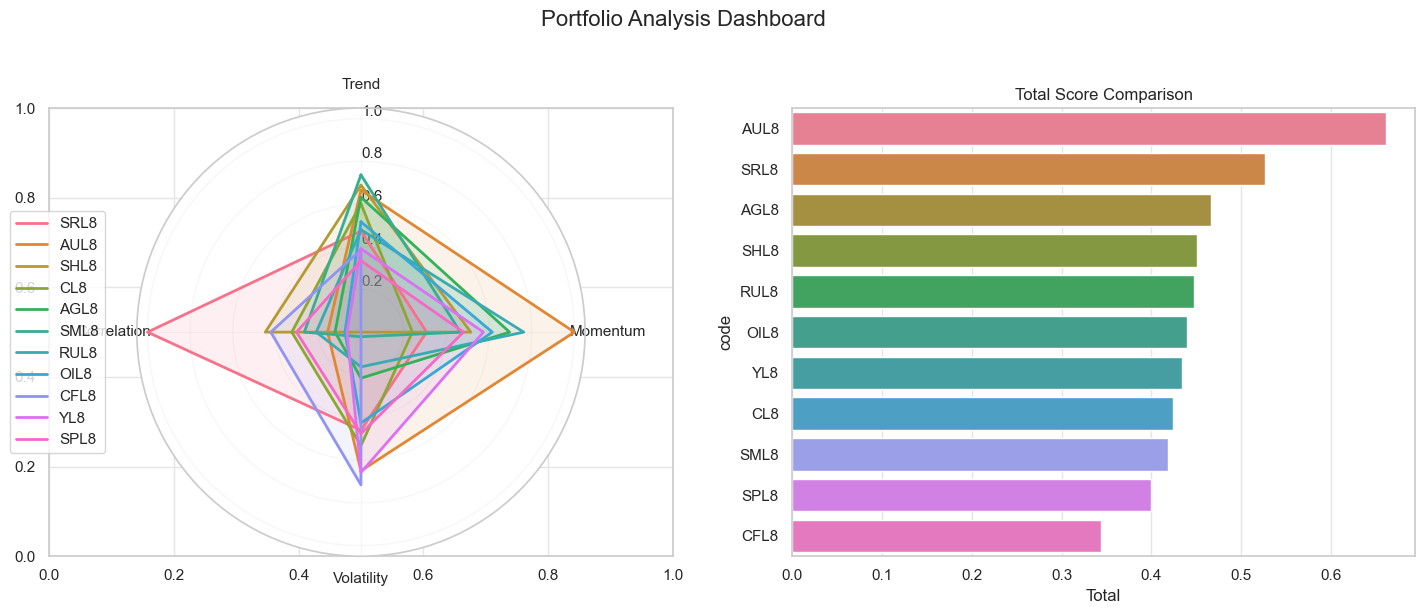

In [16]:

# 初始化分析器
analyzer = CommodityAnalyzer(future_data.drop_duplicates())

# 设置权重
weights = {
    'trend': 0.3,      # Emphasize trend strength
    'momentum': 0.2,   # Moderate emphasis on momentum
    'volatility': 0.2, # Consider volatility
    'correlation': 0.3 # Minor consideration for correlation
}


# 选择商品组合
selected_portfolio = analyzer.select_portfolio(
    n_select=11,
    weights=weights,
    trend_threshold=0.9,
    vol_threshold=0.9
)

print("Selected Portfolio:", selected_portfolio)

# 选择商品组合
# selected_portfolio = analyzer.select_portfolio(n_select=3)

# 绘制多维度分析图表
# analyzer.plot_trend_analysis(selected_portfolio)
# analyzer.plot_momentum_analysis(selected_portfolio)
# analyzer.plot_volatility_analysis(selected_portfolio)
# analyzer.plot_correlation_matrix(selected_portfolio)
analyzer.plot_portfolio_analysis(selected_portfolio)